##Take a look at results

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('results.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
df.shape

(17964, 5)

In [5]:
df.describe()

,City_Count,Score
count,17964.000000,17964.000000
mean,154.174460,85.292474
std,3361.379508,11.072794
min,1.000000,0.000000
25%,1.000000,77.000000
50%,2.000000,90.000000
75%,10.000000,90.000000
max,307959.000000,100.000000


###Most of the cities with score < 60 are nonsense

In [7]:
below_60 = df[df['Score'] < 60]
# below_60.sort(['Score', 'Corrected_City'], ascending=False)

In [8]:
below_60.describe()

,City_Count,Score
count,93.000000,93.000000
mean,1.397849,16.010753
std,1.336281,13.205314
min,1.000000,0.000000
25%,1.000000,10.000000
50%,1.000000,13.000000
75%,1.000000,18.000000
max,12.000000,55.000000


###Score >= 60

In [9]:
above_60 = df[df['Score'] >= 60]

In [10]:
above_60.describe()

,City_Count,Score
count,17871.000000,17871.000000
mean,154.969504,85.653013
std,3370.096775,9.860877
min,1.000000,60.000000
25%,1.000000,77.000000
50%,2.000000,90.000000
75%,10.000000,90.000000
max,307959.000000,100.000000


In [14]:
# above_60.sort('Clean_City')

In [16]:
# above_60[above_60['Score'] == 80]

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

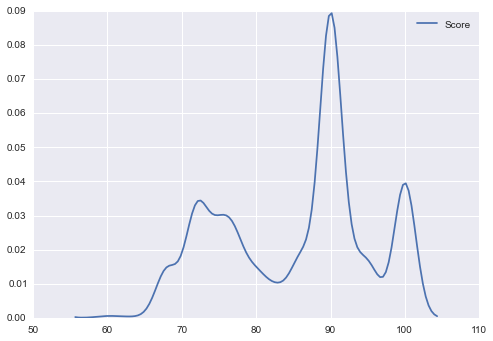

In [18]:
## density plot for score >= 60
sns.kdeplot(above_60.Score)

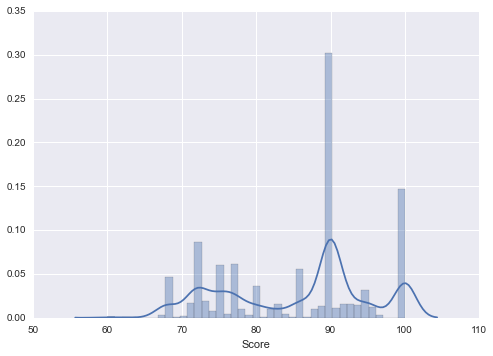

In [19]:
sns.distplot(above_60.Score)

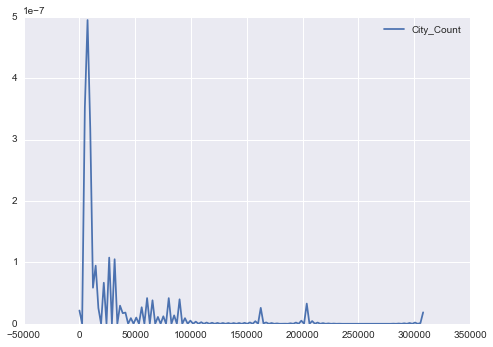

In [20]:
sns.kdeplot(above_60.City_Count)

/Users/oksitosin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


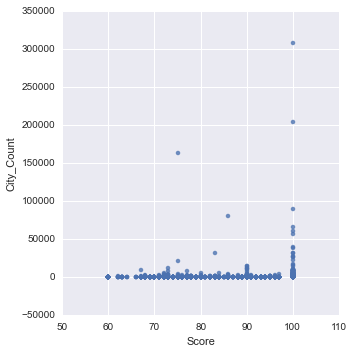

In [21]:
sns.lmplot('Score', 'City_Count', data=above_60, fit_reg=False)

(array([   48.,    68.,  1166.,  3016.,  1359.,  1093.,  1065.,  5860.,
         1363.,  2833.]),
 array([  60.,   64.,   68.,   72.,   76.,   80.,   84.,   88.,   92.,
          96.,  100.]),
 <a list of 10 Patch objects>)

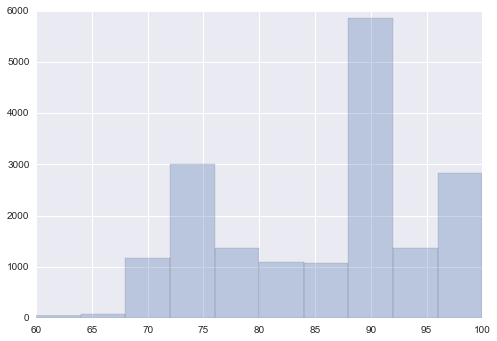

In [22]:
plt.hist(above_60.Score, alpha=.3)

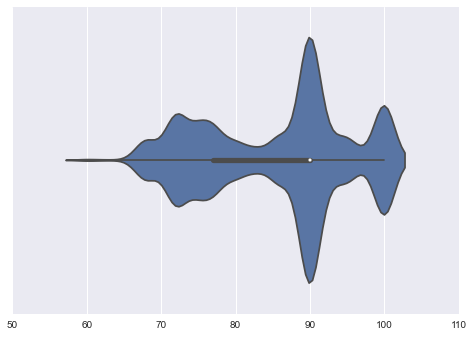

In [23]:
sns.violinplot([above_60.Score])

##Now it is time to expand the results

Clean the counties input data as they provided:

In [24]:
countries_input = pd.read_csv('../data/Country_Map.txt', sep='|', index_col=False)

In [25]:
countries_input.describe()

,Country Code,Country Name
count,233,234
unique,233,233
top,QA,Mexico
freq,1,2


In [26]:
countries_input.head()

,Country Code,Country Name
0,AF,Afghanistan
1,AL,Albania
2,DZ,Algeria
3,AS,American Samoa
4,AD,Andorra


In [27]:
above_60.head()

,Clean_Code,Clean_City,City_Count,Corrected_City,Score
0,AD,ANDORRA,3,ANDORRA,100
1,AD,CENTURION,1,CENTURION,72
2,AD,LES ESCALDES ENGO,1,LES CAYES,86
3,AD,MERITXELL,7,MERITXELL,71
4,AE,ABU DHABI,21,ABU DHABI,100


In [28]:
from handle_strings import handle_strings
countries_input[['Country Code', 'Country Name']] = countries_input[['Country Code', 'Country Name']].astype(str)

In [29]:
countries_input['Clean_Country'] = countries_input['Country Name'].apply(handle_strings)
countries_input['Clean_Code'] = countries_input['Country Code'].apply(handle_strings)

In [30]:
countries = countries_input[['Clean_Code', 'Clean_Country']]

In [31]:
countries.head()

,Clean_Code,Clean_Country
0,AF,AFGHANISTAN
1,AL,ALBANIA
2,DZ,ALGERIA
3,AS,AMERICAN SAMOA
4,AD,ANDORRA


In [130]:
countries[countries['Clean_Country'] == 'NAMIBIA']

,Clean_Code,Clean_Country
140,NAN,NAMIBIA


###MERGE countries info with results

score above 60

In [41]:
merged = above_60.merge(countries, on='Clean_Code',how='outer')

In [42]:
len(merged[merged['Clean_City'].isnull()])

35

In [43]:
print merged.shape
merged.head()

(17904, 6)


,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA
1,AD,CENTURION,1,CENTURION,72,ANDORRA
2,AD,LES ESCALDES ENGO,1,LES CAYES,86,ANDORRA
3,AD,MERITXELL,7,MERITXELL,71,ANDORRA
4,AE,ABU DHABI,21,ABU DHABI,100,UNITED ARAB EMIRATES


In [44]:
above_60.shape

(17871, 5)

###2nd merge is with world_cities reference df. 

In [49]:
wc = pd.read_csv('world_cities_clean.csv')

In [50]:
wc.head()

,Unnamed: 0,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,Clean_City,Clean_Code
0,0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997,Afghanistan,AF,AFG,Badghis,QAL EHYE,AF
1,1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000,Afghanistan,AF,AFG,Ghor,CHAGHCHARAN,AF
2,2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546,Afghanistan,AF,AFG,Hilmand,LASHKAR GAH,AF
3,3,Zaranj,Zaranj,31.112001,61.886998,49851,Afghanistan,AF,AFG,Nimroz,ZARANJ,AF
4,4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000,Afghanistan,AF,AFG,Uruzgan,TARIN KOWT,AF


In [51]:
wc = wc.drop(['Unnamed: 0', 'city', 'city_ascii', 'country', 'iso2', 'iso3', 'province', 'Clean_Code'], axis=1)

In [55]:
# change the name Clean_City to Corrected_City
wc.columns=['lat', 'lng', 'pop', 'Corrected_City']

In [56]:
wc[wc['Corrected_City'] == 'LES CAYES']

,lat,lng,pop,Corrected_City
2847,18.200374,-73.749979,122728.5,LES CAYES


In [57]:
merged.head()

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA
1,AD,CENTURION,1,CENTURION,72,ANDORRA
2,AD,LES ESCALDES ENGO,1,LES CAYES,86,ANDORRA
3,AD,MERITXELL,7,MERITXELL,71,ANDORRA
4,AE,ABU DHABI,21,ABU DHABI,100,UNITED ARAB EMIRATES


In [58]:
merged2 = merged.merge(wc, on='Corrected_City',how='outer')

In [59]:
merged2.head()

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
1,ES,ANDORRA,1,ANDORRA,100,SPAIN,42.500001,1.516486,38127
2,AD,CENTURION,1,CENTURION,72,ANDORRA,NaN,NaN,NaN
3,AF,CENTURION,1,CENTURION,72,AFGHANISTAN,NaN,NaN,NaN
4,SA,CENTURION,1,CENTURION,72,SAUDI ARABIA,NaN,NaN,NaN


In [105]:
merged2[merged2['Clean_Code'] == 'AD']

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
2,AD,CENTURION,1,CENTURION,72,ANDORRA,NaN,NaN,NaN
6,AD,LES ESCALDES ENGO,1,LES CAYES,86,ANDORRA,18.200374,-73.749979,122728.5
40,AD,MERITXELL,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN


In [104]:
above_60[above_60['Corrected_City'] == 'ANDORRA']

,Clean_Code,Clean_City,City_Count,Corrected_City,Score
0,AD,ANDORRA,3,ANDORRA,100
5209,ES,ANDORRA,1,ANDORRA,100


In [62]:
print(len(merged2))
print len(merged2[merged2['lat'].isnull()])
print len(merged2[merged2['lng'].isnull()])
print len(merged2[merged2['pop'].isnull()])
print len(merged2[merged2['Score'].isnull()])
print len(merged2[merged2['Corrected_City'].isnull()])

24010
6314
6314
6314
4516
33


In [67]:
# merged2[merged2['Score'].isnull()]
# merged2[merged2['Corrected_City'].isnull()]
merged2[merged2['Clean_Code'] == 'AD']

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
2,AD,CENTURION,1,CENTURION,72,ANDORRA,NaN,NaN,NaN
6,AD,LES ESCALDES ENGO,1,LES CAYES,86,ANDORRA,18.200374,-73.749979,122728.5
40,AD,MERITXELL,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN


In [119]:
merged2.dtypes

Clean_Code         object
Clean_City         object
City_Count        float64
Corrected_City     object
Score             float64
Clean_Country      object
lat               float64
lng               float64
pop               float64
dtype: object

Drop the rows where score is NaN

In [75]:
merged3 = merged2[merged2['Score'].notnull()]

In [76]:
## merged3 = merged2.dropna(subset=['Score'])
# df.dropna(subset=[column_name])   #Drop only if NaN in specific column 

In [78]:
print merged2.shape
print merged3.shape

(24010, 9)
(19494, 9)


In [79]:
merged3.sort('pop', ascending = False)

/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
8867,JP,ITABASHIKU TOKYO,1,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8872,JP,TOSHIMATOKYO,36,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8863,GB,TOKYO,1,TOKYO,100,UNITED KINGDOM,35.685017,139.751407,22006299.5
8864,JP,CHIYODAKUTOKYO,1,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8865,JP,CHUOKU TOKYO,14,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8866,JP,CYUOKUTOKYO,44,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8868,JP,SHIBUYUKU TOKYO,17,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8869,JP,SHINJUKUKU TOKYO,2,TOKYO,90,JAPAN,35.685017,139.751407,22006299.5
8870,JP,TOKOYO,5,TOKYO,91,JAPAN,35.685017,139.751407,22006299.5
8871,JP,TOKYO,5915,TOKYO,100,JAPAN,35.685017,139.751407,22006299.5


##Try to eliminate the wrong entries on Corrected_City 
for ex: Tokyo, Mumbai, New York, New Mexico.. etc. 
###Keep the most common one among the Corrected_Cities

In [81]:
temp = merged3[(merged3['Corrected_City'] == 'TOKYO') | (merged3['Corrected_City'] == 'MUMBAI') | 
               (merged3['Corrected_City'] == 'NEW YORK')]

In [82]:
temp

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
8726,CN,MUMBAI,48,MUMBAI,100,CHINA,19.016990,72.856989,15834918.0
8727,GB,MUMBAI,1,MUMBAI,100,UNITED KINGDOM,19.016990,72.856989,15834918.0
8728,ID,MUMBAI,1,MUMBAI,100,INDONESIA,19.016990,72.856989,15834918.0
8729,IN,ANDHERI MUMBAI,1,MUMBAI,90,INDIA,19.016990,72.856989,15834918.0
8730,IN,ANDHERI MUMBAI,3,MUMBAI,90,INDIA,19.016990,72.856989,15834918.0
8731,IN,E MUMBAI,2,MUMBAI,95,INDIA,19.016990,72.856989,15834918.0
8732,IN,EAST MUMBAI,1,MUMBAI,90,INDIA,19.016990,72.856989,15834918.0
8733,IN,EAST MUMBAI,2,MUMBAI,90,INDIA,19.016990,72.856989,15834918.0
8734,IN,EMUMBAI,1,MUMBAI,92,INDIA,19.016990,72.856989,15834918.0
8735,IN,HERI EASTMUMBAI,1,MUMBAI,90,INDIA,19.016990,72.856989,15834918.0


In [83]:
idx = temp.groupby('Corrected_City')['City_Count'].idxmax()
idx

Corrected_City
MUMBAI       8739
NEW YORK    10072
TOKYO        8871
Name: City_Count, dtype: int64

In [84]:
temp.loc[idx, ['Clean_City', 'Clean_Code', 'City_Count', 'Corrected_City', 'Score', 'Clean_Country', 'lat','lng','pop']]

# test1 = temp.loc[idx, ['Clean_City', 'Clean_Code', 'City_Count', 'Corrected_City', 'Score', 
#                'Clean_Country', 'lat','lng','pop']].apply(lambda x: x.sum())

# test = temp.groupby(['Clean_City'])['City_Count'].apply(lambda x: x.sum())

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
8739,MUMBAI,IN,9340,MUMBAI,100,INDIA,19.016990,72.856989,15834918.0
10072,NEW YORK,US,8290,NEW YORK,100,UNITED STATES,40.749979,-73.980017,13524139.0
8871,TOKYO,JP,5915,TOKYO,100,JAPAN,35.685017,139.751407,22006299.5


##Apply this to merged3 dataframe:

In [85]:
merged3.head()

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
1,ES,ANDORRA,1,ANDORRA,100,SPAIN,42.500001,1.516486,38127
2,AD,CENTURION,1,CENTURION,72,ANDORRA,NaN,NaN,NaN
3,AF,CENTURION,1,CENTURION,72,AFGHANISTAN,NaN,NaN,NaN
4,SA,CENTURION,1,CENTURION,72,SAUDI ARABIA,NaN,NaN,NaN


In [86]:
idx1 = merged3.groupby('Clean_City')['City_Count'].idxmax()

In [89]:
merged4 = merged3.loc[idx1, ['Clean_City', 'Clean_Code', 'City_Count', 'Corrected_City', 'Score', 
                              'Clean_Country', 'lat','lng','pop']]

In [90]:
print merged3.shape
print merged4.shape

(19494, 9)
(16377, 9)


In [91]:
merged4[merged4['Clean_Code'] == 'AD']

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
6,LES ESCALDES ENGO,AD,1,LES CAYES,86,ANDORRA,18.200374,-73.749979,122728.5
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN


In [93]:
# merged4.sort('City_Count', ascending = False)

In [108]:
print merged4['City_Count'].sum()
print merged3['City_Count'].sum()
print df['City_Count'].sum()
print merged4.shape
print merged3.shape
print df.shape

2752030.0
3152371.0
2769590
(16377, 9)
(19494, 9)
(17964, 5)


###Going to the final

Lets assume this is the result. 

I took score < 81 to change the name of the city.
lets expand the city names with counts:

In [109]:
temp2 = merged4[(merged4['Clean_Code'] == 'AD')]

In [110]:
merged.head()

,Clean_Code,Clean_City,City_Count,Corrected_City,Score,Clean_Country
0,AD,ANDORRA,3,ANDORRA,100,ANDORRA
1,AD,CENTURION,1,CENTURION,72,ANDORRA
2,AD,LES ESCALDES ENGO,1,LES CAYES,86,ANDORRA
3,AD,MERITXELL,7,MERITXELL,71,ANDORRA
4,AE,ABU DHABI,21,ABU DHABI,100,UNITED ARAB EMIRATES


In [111]:
temp2

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
6,LES ESCALDES ENGO,AD,1,LES CAYES,86,ANDORRA,18.200374,-73.749979,122728.5
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN


In [112]:
temp2['City_Count'] = temp2['City_Count'].astype(int)

/Users/oksitosin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
import numpy as np
temp3 = temp2.reindex(np.repeat(temp2.index.values, temp2['City_Count']), method='ffill')

In [115]:
temp3

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
6,LES ESCALDES ENGO,AD,1,LES CAYES,86,ANDORRA,18.200374,-73.749979,122728.5
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN
40,MERITXELL,AD,7,MERITXELL,71,ANDORRA,NaN,NaN,NaN


###See if it will work with the actual result

In [119]:
merged4.shape

(16377, 9)

In [120]:
merged4 = merged4.sort_index()

In [121]:
%time 
merged4['City_Count'] = merged4['City_Count'].astype(int)
finaldf = merged4.reindex(np.repeat(merged4.index.values, merged4['City_Count']), method='ffill')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [125]:
finaldf.head()

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN


In [126]:
finaldf.shape

(2752030, 9)

In [127]:
merged4['City_Count'].sum()

2752030

In [128]:
finaldf

,Clean_City,Clean_Code,City_Count,Corrected_City,Score,Clean_Country,lat,lng,pop
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
0,ANDORRA,AD,3,ANDORRA,100,ANDORRA,42.500001,1.516486,38127.0
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN
5,CENTURION,ZA,70,CENTURION,72,SOUTH AFRICA,NaN,NaN,NaN


In [129]:
finaldf.to_csv('finalresults.csv')